# Analyisis of fermentation data from scale-down experiments with substrate and/or oxygen oscillations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

from matplotlib.patches import Patch
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

from matplotlib.patches import ConnectionPatch

In [2]:
# formatting
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

yellow = (255/255, 204/255, 0/255)

In [3]:
offline_data = pd.read_excel("../data/processed_fermentation_data/processed_offline_data.xlsx")
online_data = pd.read_excel("../data/processed_fermentation_data/processed_online_data.xlsx")
meta_data = pd.read_excel("../data/processed_fermentation_data/processed_meta_data.xlsx") 

In [4]:
offline_data["Strain"] = offline_data["Strain Batch"].str.split("-",expand=True)[0]
online_data["Strain"] = online_data["Strain Batch"].str.split("-",expand=True)[0]
meta_data["Strain"] = meta_data["Strain Batch"].str.split("-",expand=True)[0]

In [5]:
strain_type_list = []
strain_type_group_list = []

for i in range(0,len(offline_data)):
    
    if (offline_data.iloc[i]["Strain"] == "DDB7") | (offline_data.iloc[i]["Strain"] == "DDB16") | (offline_data.iloc[i]["Strain"] == "DDB35"):
        strain_type_list.append("WT")
        strain_type_group_list.append("WT_and_TF")
    elif offline_data.iloc[i]["Strain"] == "HMP3071":
        strain_type_list.append("TPS")
        strain_type_group_list.append("TPS")
    else:
        strain_type_list.append("TF KO")
        strain_type_group_list.append("WT_and_TF")

offline_data["Strain Type"] = strain_type_list
offline_data["Strain Type Group"] = strain_type_group_list

strain_type_list = []
strain_type_group_list = []

for i in range(0,len(online_data)):
    
    if (online_data.iloc[i]["Strain"] == "DDB7") | (online_data.iloc[i]["Strain"] == "DDB16") | (online_data.iloc[i]["Strain"] == "DDB35"):
        strain_type_list.append("WT")
        strain_type_group_list.append("WT_and_TF")
    elif online_data.iloc[i]["Strain"] == "HMP3071":
        strain_type_list.append("TPS")
        strain_type_group_list.append("TPS")
    else:
        strain_type_list.append("TF KO")
        strain_type_group_list.append("WT_and_TF")

online_data["Strain Type"] = strain_type_list
online_data["Strain Type Group"] = strain_type_group_list

In [6]:
mu_set_list = []

for i in range(0,len(offline_data)):
    
    if offline_data.iloc[i]["feed_time"] > 0:
        mu_set_list.append(offline_data.iloc[i]["growth_rate"])
    else:
        mu_set_list.append("none")
    
offline_data["mu_set"] = mu_set_list

## Data Source

In [7]:
meta_data["Strain"] = meta_data["Strain Batch"].str.split("-", expand=True)[0]

In [8]:
len(meta_data["Parent Culture"].unique())

137

In [9]:
len(offline_data["Parent Culture"].unique())

133

In [10]:
len(online_data["Parent Culture"].unique())

133

## OD to CDW

C:\Users\jonas\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


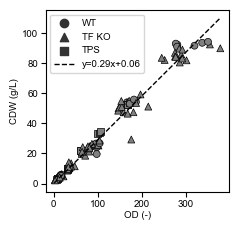

In [11]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax1 = fig.add_subplot(spec[:,:])

sns.scatterplot(
    data=offline_data[offline_data["correlated_CDW"] == "no"],
    y="CDW_avg [g/L]",
    x="OD",
    style="Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    linewidth=0.5,
    edgecolor='k',
    color="grey",
    s=25
)

xy_data = offline_data[offline_data["correlated_CDW"] == "no"]
xy_data = offline_data[["CDW_avg [g/L]", "OD"]]
xy_data.dropna(inplace=True)

x = xy_data["OD"]
y = xy_data["CDW_avg [g/L]"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax1.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

plt.legend(fontsize=7)

ax1.set_xlabel("OD (-)")
ax1.set_ylabel("CDW (g/L)")

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("OD_correlation.svg", dpi=900);

In [12]:
r_value*r_value

0.995033182830611

In [13]:
data = offline_data[offline_data["correlated_CDW"] == "no"]

In [14]:
data["Strain"].unique()

array(['DDB35', 'HMP3071', 'SDT173', 'SDT178', 'SDT180', 'SDT201',
       'SDT202'], dtype=object)

In [15]:
len(data["Parent Culture"].unique())

23

### Biomass yield batch vs feed

In [16]:
# data = offline_data[offline_data["correlated_CDW"] == "no"]
data = offline_data
data = data[data["Experiment"] != "DDB_PD_067_AMBR"]
data = data[data["Experiment"] != "DDB_PD_073_AMBR"]
data["abs_feed_time"] = data["feed_time"].abs()

In [17]:
data["Parent Culture"].unique()

array(['DDB_PD_005_AMBR_DDB7-002_R01_Main_',
       'DDB_PD_005_AMBR_DDB7-002_R02_Main_',
       'DDB_PD_005_AMBR_DDB12-001_R03_Main_',
       'DDB_PD_005_AMBR_DDB12-001_R04_Main_',
       'DDB_PD_005_AMBR_DDB15-001_R05_Main_',
       'DDB_PD_005_AMBR_DDB15-001_R06_Main_',
       'DDB_PD_005_AMBR_DDB16-001_R07_Main_',
       'DDB_PD_005_AMBR_DDB16-001_R08_Main_',
       'DDB_PD_006_AMBR_DDB25-001_R01_Main_',
       'DDB_PD_006_AMBR_DDB25-001_R02_Main_',
       'DDB_PD_006_AMBR_DDB28-001_R04_Main_',
       'DDB_PD_006_AMBR_DDB28-001_R05_Main_',
       'DDB_PD_006_AMBR_DDB29-001_R06_Main_',
       'DDB_PD_006_AMBR_DDB29-001_R07_Main_',
       'DDB_PD_009_AMBR_DDB26-001_R01_Main_',
       'DDB_PD_009_AMBR_DDB26-001_R02_Main_',
       'DDB_PD_009_AMBR_DDB27-001_R04_Main_',
       'DDB_PD_009_AMBR_DDB27-001_R05_Main_',
       'DDB_PD_009_AMBR_DDB30-001_R06_Main_',
       'DDB_PD_009_AMBR_DDB30-001_R07_Main_',
       'DDB_PD_009_AMBR_DDB31-001_R08_Main_',
       'DDB_PD_009_AMBR_DDB31-001_R0

In [18]:
min_abs_feed_time = data.groupby("Parent Culture")["abs_feed_time"].min().reset_index()
min_abs_feed_time

,Parent Culture,abs_feed_time
0,DDB_PD_005_AMBR_DDB12-001_R03_Main_,0.003066
1,DDB_PD_005_AMBR_DDB12-001_R04_Main_,0.003109
2,DDB_PD_005_AMBR_DDB15-001_R05_Main_,0.014271
3,DDB_PD_005_AMBR_DDB15-001_R06_Main_,0.017173
4,DDB_PD_005_AMBR_DDB16-001_R07_Main_,0.003441
...,...,...
114,DDB_PD_123_AMBR_DDB35-006_R05_Main_,0.047252
115,DDB_PD_123_AMBR_SDT173-002_R07_Main_,0.054592
116,DDB_PD_123_AMBR_SDT178-002_R09_Main_,0.067861
117,DDB_PD_123_AMBR_SDT180-003_R11_Main_,0.060756


In [19]:
max_feed_time = data.groupby("Parent Culture")["feed_time"].max().reset_index()
max_feed_time

,Parent Culture,feed_time
0,DDB_PD_005_AMBR_DDB12-001_R03_Main_,15.003684
1,DDB_PD_005_AMBR_DDB12-001_R04_Main_,15.008730
2,DDB_PD_005_AMBR_DDB15-001_R05_Main_,15.020229
3,DDB_PD_005_AMBR_DDB15-001_R06_Main_,15.021225
4,DDB_PD_005_AMBR_DDB16-001_R07_Main_,14.998033
...,...,...
114,DDB_PD_123_AMBR_DDB35-006_R05_Main_,59.987265
115,DDB_PD_123_AMBR_SDT173-002_R07_Main_,60.007987
116,DDB_PD_123_AMBR_SDT178-002_R09_Main_,60.000444
117,DDB_PD_123_AMBR_SDT180-003_R11_Main_,59.973678


In [20]:
df1 = pd.merge(left=min_abs_feed_time, right=data, how="left")
df1["delta_net_CO2_batch"] = df1["Formed_CO2"]
df1["delta_net_X_batch"] = df1["net_biomass_cmol"]
df1["delta_net_S_batch"] = df1["net_glucose_cmol"]

df2 = pd.merge(left=max_feed_time, right=data, how="left")
df2["net_CO2_feed_end"] = df2["Formed_CO2"]
df2["net_X_feed_end"] = df2["net_biomass_cmol"]
df2["net_S_feed_end"] = df2["net_glucose_cmol"]

df1 = df1[["Parent Culture", "Strain Type Group", "Strain Type", "Strain", "Base Medium", "delta_net_CO2_batch", "delta_net_X_batch", "delta_net_S_batch", "Experiment"]]
df2 = df2[["Parent Culture", "Strain Type Group", "Strain Type", "Strain", "Base Medium", "net_CO2_feed_end", "net_X_feed_end", "net_S_feed_end", "Experiment"]]

In [21]:
df = pd.merge(left=df1, right=df2, how="left")

In [22]:
df["delta_net_X_feed"] = df["net_X_feed_end"] - df["delta_net_X_batch"]
df["delta_net_S_feed"] = df["net_S_feed_end"] - df["delta_net_S_batch"]
df["delta_net_CO2_feed"] = df["net_CO2_feed_end"] - df["delta_net_CO2_batch"]

In [23]:
df_batch = df[["Parent Culture", "Strain Type Group", "Strain Type", "Strain", "Base Medium", "delta_net_X_batch", "delta_net_S_batch", "delta_net_CO2_batch", "Experiment"]]
df_feed = df[["Parent Culture", "Strain Type Group", "Strain Type", "Strain", "Base Medium", "delta_net_X_feed", "delta_net_S_feed", "delta_net_CO2_feed", "Experiment"]]

In [24]:
df_batch["Ysx"] = df_batch["delta_net_X_batch"]/df_batch["delta_net_S_batch"]
df_batch["Ysc"] = df_batch["delta_net_CO2_batch"]/df_batch["delta_net_S_batch"]
df_batch["phase"] = "batch"

C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\1301913733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch["Ysx"] = df_batch["delta_net_X_batch"]/df_batch["delta_net_S_batch"]
C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\1301913733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch["Ysc"] = df_batch["delta_net_CO2_batch"]/df_batch["delta_net_S_batch"]
C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\1301913733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [25]:
df_feed["Ysx"] = df_feed["delta_net_X_feed"]/df_feed["delta_net_S_feed"]
df_feed["Ysc"] = df_feed["delta_net_CO2_feed"]/df_feed["delta_net_S_feed"]
df_feed["phase"] = "feed"

C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\3560110030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feed["Ysx"] = df_feed["delta_net_X_feed"]/df_feed["delta_net_S_feed"]
C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\3560110030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feed["Ysc"] = df_feed["delta_net_CO2_feed"]/df_feed["delta_net_S_feed"]
C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\3560110030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [26]:
df_batch

,Parent Culture,Strain Type Group,Strain Type,Strain,Base Medium,delta_net_X_batch,delta_net_S_batch,delta_net_CO2_batch,Experiment,Ysx,Ysc,phase
0,DDB_PD_005_AMBR_DDB12-001_R03_Main_,WT_and_TF,TF KO,DDB12,DDB_BM_002,0.031267,0.062224,0.039345,DDB_PD_005_AMBR,0.502489,0.632304,batch
1,DDB_PD_005_AMBR_DDB12-001_R04_Main_,WT_and_TF,TF KO,DDB12,DDB_BM_002,0.034400,0.062127,0.019940,DDB_PD_005_AMBR,0.553708,0.320949,batch
2,DDB_PD_005_AMBR_DDB15-001_R05_Main_,WT_and_TF,TF KO,DDB15,DDB_BM_002,0.033331,0.062493,0.018618,DDB_PD_005_AMBR,0.533363,0.297928,batch
3,DDB_PD_005_AMBR_DDB15-001_R06_Main_,WT_and_TF,TF KO,DDB15,DDB_BM_002,0.032436,0.062511,0.018656,DDB_PD_005_AMBR,0.518876,0.298442,batch
4,DDB_PD_005_AMBR_DDB16-001_R07_Main_,WT_and_TF,WT,DDB16,DDB_BM_002,0.028769,0.062406,0.017858,DDB_PD_005_AMBR,0.461007,0.286163,batch
...,...,...,...,...,...,...,...,...,...,...,...,...
114,DDB_PD_123_AMBR_DDB35-006_R05_Main_,WT_and_TF,WT,DDB35,DDB_BM_016,0.039566,0.065036,0.018456,DDB_PD_123_AMBR,0.608367,0.283777,batch
115,DDB_PD_123_AMBR_SDT173-002_R07_Main_,WT_and_TF,TF KO,SDT173,DDB_BM_016,0.039136,0.065115,0.019438,DDB_PD_123_AMBR,0.601019,0.298511,batch
116,DDB_PD_123_AMBR_SDT178-002_R09_Main_,WT_and_TF,TF KO,SDT178,DDB_BM_016,0.036339,0.064177,0.026191,DDB_PD_123_AMBR,0.566222,0.408103,batch
117,DDB_PD_123_AMBR_SDT180-003_R11_Main_,WT_and_TF,TF KO,SDT180,DDB_BM_016,0.052188,0.064563,0.021884,DDB_PD_123_AMBR,0.808337,0.338962,batch


In [27]:
df_batch = df_batch[["Parent Culture", "Strain Type Group","Strain Type","Strain","Base Medium","Ysx","Ysc","phase", "Experiment"]]
df_feed = df_feed[["Parent Culture", "Strain Type Group","Strain Type","Strain","Base Medium","Ysx","Ysc","phase", "Experiment"]]

In [28]:
df = pd.concat([df_batch, df_feed])

In [29]:
len(df["Parent Culture"].unique())

119

In [30]:
df

,Parent Culture,Strain Type Group,Strain Type,Strain,Base Medium,Ysx,Ysc,phase,Experiment
0,DDB_PD_005_AMBR_DDB12-001_R03_Main_,WT_and_TF,TF KO,DDB12,DDB_BM_002,0.502489,0.632304,batch,DDB_PD_005_AMBR
1,DDB_PD_005_AMBR_DDB12-001_R04_Main_,WT_and_TF,TF KO,DDB12,DDB_BM_002,0.553708,0.320949,batch,DDB_PD_005_AMBR
2,DDB_PD_005_AMBR_DDB15-001_R05_Main_,WT_and_TF,TF KO,DDB15,DDB_BM_002,0.533363,0.297928,batch,DDB_PD_005_AMBR
3,DDB_PD_005_AMBR_DDB15-001_R06_Main_,WT_and_TF,TF KO,DDB15,DDB_BM_002,0.518876,0.298442,batch,DDB_PD_005_AMBR
4,DDB_PD_005_AMBR_DDB16-001_R07_Main_,WT_and_TF,WT,DDB16,DDB_BM_002,0.461007,0.286163,batch,DDB_PD_005_AMBR
...,...,...,...,...,...,...,...,...,...
114,DDB_PD_123_AMBR_DDB35-006_R05_Main_,WT_and_TF,WT,DDB35,DDB_BM_016,0.625189,0.431607,feed,DDB_PD_123_AMBR
115,DDB_PD_123_AMBR_SDT173-002_R07_Main_,WT_and_TF,TF KO,SDT173,DDB_BM_016,0.558581,0.480969,feed,DDB_PD_123_AMBR
116,DDB_PD_123_AMBR_SDT178-002_R09_Main_,WT_and_TF,TF KO,SDT178,DDB_BM_016,0.541621,0.505310,feed,DDB_PD_123_AMBR
117,DDB_PD_123_AMBR_SDT180-003_R11_Main_,WT_and_TF,TF KO,SDT180,DDB_BM_016,0.570029,0.443189,feed,DDB_PD_123_AMBR


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'DDB_PD_005_AMBR'),
  Text(1, 0, 'DDB_PD_006_AMBR'),
  Text(2, 0, 'DDB_PD_009_AMBR'),
  Text(3, 0, 'DDB_PD_036_AMBR'),
  Text(4, 0, 'DDB_PD_045_AMBR'),
  Text(5, 0, 'DDB_PD_060_AMBR'),
  Text(6, 0, 'DDB_PD_065_AMBR'),
  Text(7, 0, 'DDB_PD_066_AMBR'),
  Text(8, 0, 'DDB_PD_116_AMBR'),
  Text(9, 0, 'DDB_PD_117_AMBR'),
  Text(10, 0, 'DDB_PD_121_AMBR'),
  Text(11, 0, 'DDB_PD_122_AMBR'),
  Text(12, 0, 'DDB_PD_123_AMBR')])

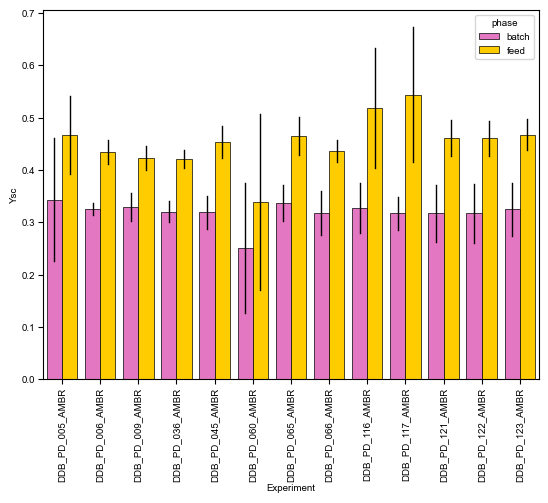

In [31]:
sns.barplot(
    data=df,
    x="Experiment",
    y="Ysc",
    hue="phase",
    errorbar="sd",
    palette=["tab:pink", yellow],
    saturation=1,
    errcolor="k",
    errwidth=1,
    # capsize=0.1,
    linewidth=0.5,
    edgecolor="k",
)

plt.xticks(rotation=90)

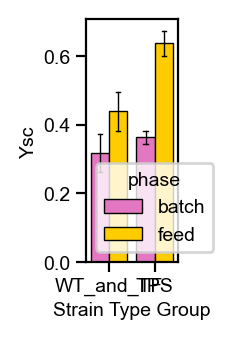

In [32]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[0,0])

sns.barplot(
    data=df,
    x="Strain Type Group",
    y="Ysc",
    hue="phase",
    errorbar="sd",
    palette=["tab:pink", yellow],
    saturation=1,
    errcolor="k",
    errwidth=0.5,
    capsize=0.1,
    linewidth=0.5,
    edgecolor="k",
    ax=ax
)


w=15/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("Ysc_barplots.svg", dpi=900);

## Biomass during the feed phase

In [33]:
data = offline_data[offline_data["correlated_CDW"] == "no"]
# data = offline_data[~offline_data["OD"].isna()]
data = data[data.Strain == "DDB35"]
data = data[data["feed_time"] > -0.5]
data = data[~data["CDW_avg [g/L]"].isna()]
data["log_CDW_conc"] = np.log(data["CDW_avg [g/L]"])
data["log_CDW_mass"] = np.log(data["net_biomass_g"])

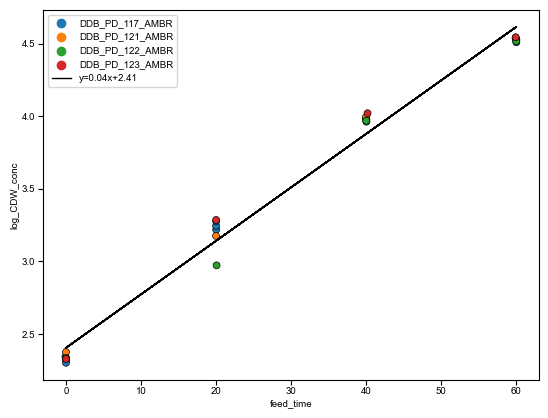

In [34]:
sns.scatterplot(
    data=data,
    y="log_CDW_conc",
    x="feed_time",
    hue="Experiment",
    linewidth=0.5,
    edgecolor='k',
    s=25,
)

y = data["log_CDW_conc"]
x = data["feed_time"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

plt.legend(fontsize=7)

In [35]:
r_value

0.9929285628719529

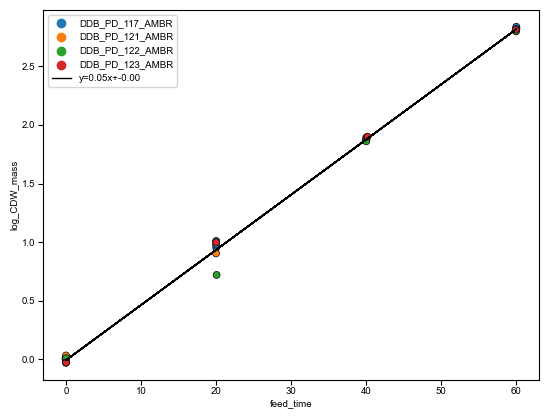

In [36]:
sns.scatterplot(
    data=data,
    y="log_CDW_mass",
    x="feed_time",
    hue="Experiment",
    linewidth=0.5,
    edgecolor='k',
    s=25,
)

y = data["log_CDW_mass"]
x = data["feed_time"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

plt.legend(fontsize=7)

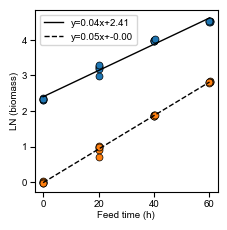

In [37]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

#############
### Conc. ###
#############

sns.scatterplot(
    data=data,
    y="log_CDW_conc",
    x="feed_time",
    # hue="Experiment",
    linewidth=0.5,
    edgecolor='k',
    s=25,
)

y = data["log_CDW_conc"]
x = data["feed_time"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

plt.legend(fontsize=7)

############
### Mass ###
############

sns.scatterplot(
    data=data,
    y="log_CDW_mass",
    x="feed_time",
    # hue="Experiment",
    linewidth=0.5,
    edgecolor='k',
    s=25,
)

y = data["log_CDW_mass"]
x = data["feed_time"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

plt.legend(fontsize=7)


ax.set_xlabel("Feed time (h)")
ax.set_ylabel("LN (biomass)")

w=60/25.4
h=60/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("growth_rate_from_LN.svg", dpi=900);

## Metal plots

In [38]:
offline_data["Base Medium"].unique()

array(['DDB_BM_002', 'DDB_BM_PD60_R06', 'DDB_BM_PD60_R07',
       'DDB_BM_PD60_R08', 'DDB_BM_PD60_R09', 'DDB_BM_PD60_R10',
       'DDB_BM_PD60_R11', 'DDB_BM_005', 'DDB_BM_003', 'DDB_BM_006',
       'DDB_BM_016', 'DDB_BM_015'], dtype=object)

In [39]:
online_data["Base Medium"].unique()

array(['DDB_BM_002', 'DDB_BM_PD60_R06', 'DDB_BM_PD60_R07',
       'DDB_BM_PD60_R08', 'DDB_BM_PD60_R09', 'DDB_BM_PD60_R10',
       'DDB_BM_PD60_R11', 'DDB_BM_005', 'DDB_BM_003', 'DDB_BM_006',
       'DDB_BM_016', 'DDB_BM_015'], dtype=object)

In [40]:
offline_data["growth_rate"].unique()

array([0.11, 0.05, 0.1 ])

### QC

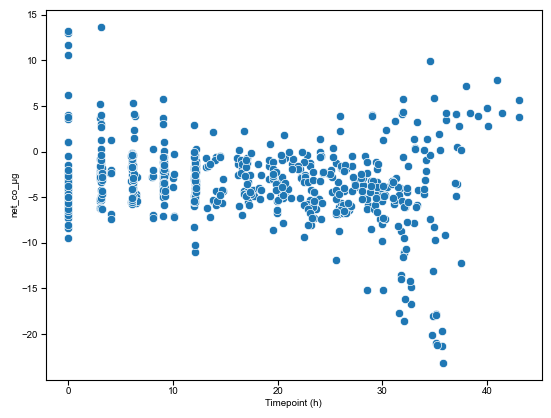

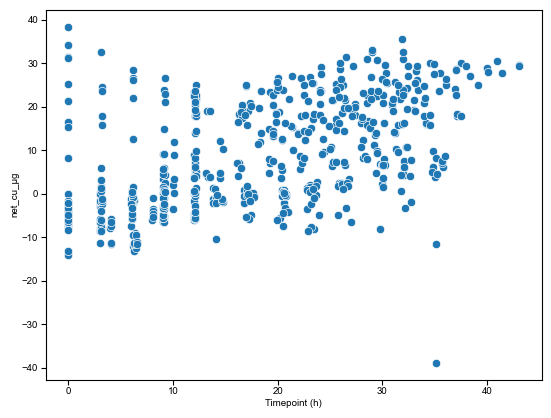

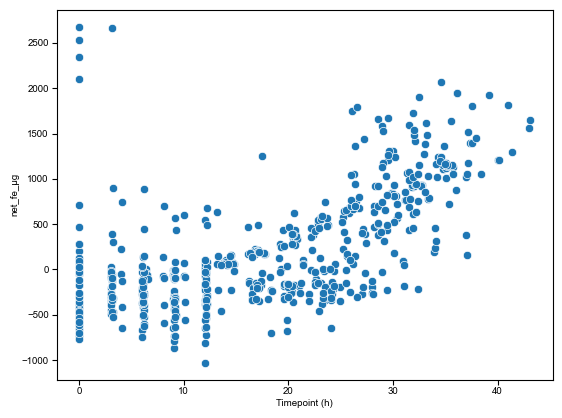

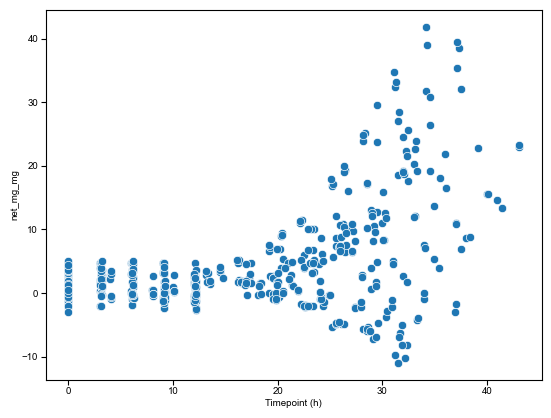

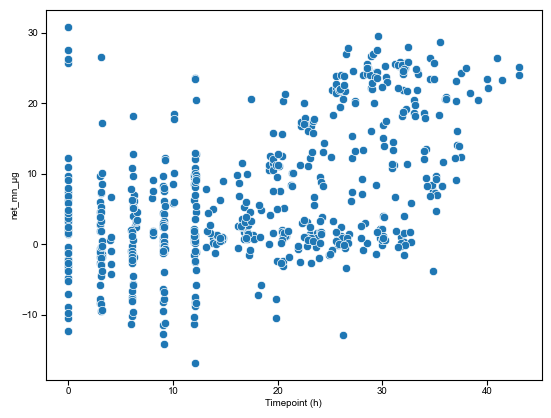

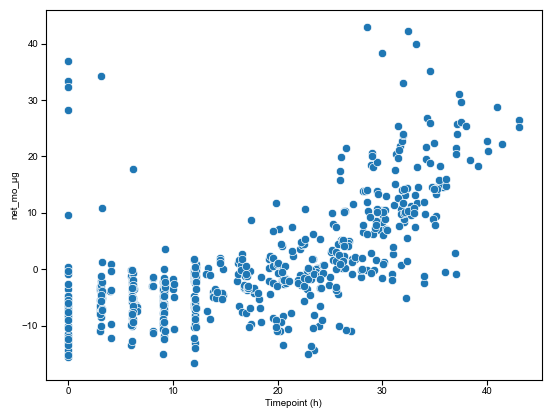

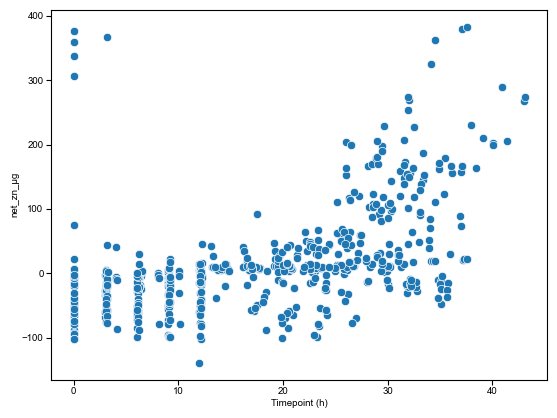

In [41]:
for net_mass in ["net_co_µg", "net_cu_µg", "net_fe_µg", "net_mg_mg", "net_mn_µg", "net_mo_µg", "net_zn_µg"]:
    
    fig, ax = plt.subplots()
    
    sns.scatterplot(
        data=offline_data,
        y=net_mass,
        x="Timepoint (h)",
        ax=ax
    )

### Metal yields on biomass yield

In [42]:
media_v_list = []

for i in range(0,len(offline_data)):
    if (offline_data.iloc[i]["Base Medium"] == "DDB_BM_002") | (offline_data.iloc[i]["Base Medium"] == "DDB_BM_003"):
        media_v_list.append("v1")
    elif (offline_data.iloc[i]["Base Medium"] == "DDB_BM_005") | (offline_data.iloc[i]["Base Medium"] == "DDB_BM_006"):
        media_v_list.append("v2")
    elif (offline_data.iloc[i]["Base Medium"] == "DDB_BM_015") | (offline_data.iloc[i]["Base Medium"] == "DDB_BM_016"):
        media_v_list.append("v3")
    else:
        media_v_list.append("custom")
    
offline_data["Media version"] = media_v_list

#### Fe

In [43]:
data = offline_data
data = data[data["Experiment"] == "DDB_PD_036_AMBR"]

slope: 168.10873834113244
intercept: -183.72253744464143
r_value: 0.8730095121880503
r^2: 0.7621456083708176
p_value: 6.198285715277643e-105
std_err: 5.1697546237867975


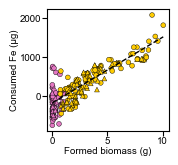

In [44]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

data = offline_data
data = data[(data["Experiment"] == "DDB_PD_036_AMBR") & (data["Timepoint (#)"] == "S12")]

# sns.scatterplot(
#     data = data,
#     x = "net_biomass_g",
#     y = "net_fe_µg",
#     hue = "mu_set",
#     style = "Strain Type",
#     style_order=['WT', 'TF KO', 'TPS'],
#     markers = ["o", "^", "s"],
#     palette = ['tab:pink', 'tab:green', 'tab:blue', 'tab:orange'],
#     hue_order=['none', 0.11, 0.05, 0.1],
#     linewidth=0.3,
#     edgecolor='k',
#     s=12,
#     alpha=0.3,
#     ax=ax
# )

data = offline_data
data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["Timepoint (#)"] == "S12"))]
# data = data[(data["Strain Type"] == "WT")]
data = data[(data["Media version"] != "v3")]

sns.scatterplot(
    data = data,
    x = "net_biomass_g",
    y = "net_fe_µg",
    hue = "mu_set",
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    palette = ['tab:pink', yellow, 'tab:blue', 'tab:orange'],
    hue_order=['none', 0.11, 0.05, 0.1],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=1,
    ax=ax
)

ax.get_legend().remove()

ax.set_ylabel("Consumed Fe (µg)")
ax.set_xlabel("Formed biomass (g)")

###################

regression_data = data
# regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_fe_µg", "net_biomass_g"]]
regression_data = regression_data.dropna()

x = regression_data["net_biomass_g"]
y = regression_data["net_fe_µg"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("Fe_growth_yield.svg", dpi=900)

print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

In [45]:
len(data.dropna(subset=["fe [µg/L]"])["Parent Culture"].unique())

42

#### Mg

slope: 3.47898069957697
intercept: 0.3518379916258674
r_value: 0.8940252587803846
r^2: 0.7992811633373337
p_value: 1.2799429097663288e-70
std_err: 0.12421189367983854


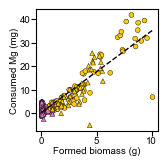

In [46]:
# data = offline_data
# data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
# data = data[(data["Strain Type"] == "WT")]
# data = data[(data["Strain Type"] == "WT")]

data = offline_data
data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
# data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["Timepoint (#)"] == "S12"))]
# data = data[(data["Strain Type"] == "WT")]
data = data[(data["Media version"] != "v3")]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])


sns.scatterplot(
    data = data,
    x = "net_biomass_g",
    y = "net_mg_mg",
    hue = "mu_set",
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    palette = ['tab:pink', yellow, 'tab:blue', 'tab:orange'],
    hue_order=['none', 0.11, 0.05, 0.1],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=1,
    ax=ax
)

ax.get_legend().remove()

ax.set_ylabel("Consumed Mg (mg)")
ax.set_xlabel("Formed biomass (g)")

###################

regression_data = data
# regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_mg_mg", "net_biomass_g"]]
regression_data = regression_data.dropna()

x = regression_data["net_biomass_g"]
y = regression_data["net_mg_mg"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Mg_growth_yield.svg", dpi=900)

print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

In [47]:
len(data.dropna(subset=["mg [mg/L]"])["Parent Culture"].unique())

31

#### Mn

slope: 4.355591712706063
intercept: 2.307617677949038
r_value: 0.7612845724727528
r^2: 0.579554200285022
p_value: 3.278347299043656e-51
std_err: 0.22919466137514508


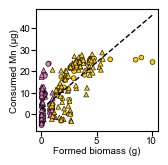

In [48]:
data = offline_data

data = data[(data["Base Medium"] == "DDB_BM_002") | (data["Base Medium"] == "DDB_BM_PD60_R06") | (data["Base Medium"] == "DDB_BM_PD60_R07") | (data["Base Medium"] == "DDB_BM_PD60_R08") | (data["Base Medium"] == "DDB_BM_PD60_R09")]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])


# sns.scatterplot(
#     data = data,
#     x = "net_biomass_g",
#     y = "net_mn_µg",
#     hue = "mu_set",
#     style = "Strain Type",
#     style_order=['WT', 'TF KO', 'TPS'],
#     markers = ["o", "^", "s"],
#     palette = ['tab:pink', 'tab:green', 'tab:blue', 'tab:orange'],
#     hue_order=['none', 0.11, 0.05, 0.1],
#     linewidth=0.3,
#     edgecolor='k',
#     s=12,
#     alpha=0.3,
#     ax=ax
# )

data = offline_data

data = data[data["Base Medium"] != "DDB_BM_002"]
data = data[data["Base Medium"] != "DDB_BM_PD60_R06"]
data = data[data["Base Medium"] != "DDB_BM_PD60_R07"]
data = data[data["Base Medium"] != "DDB_BM_PD60_R08"]
data = data[data["Base Medium"] != "DDB_BM_PD60_R09"]
data = data[(data["Media version"] != "v3")]

sns.scatterplot(
    data = data,
    x = "net_biomass_g",
    y = "net_mn_µg",
    hue = "mu_set",
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    palette = ['tab:pink', yellow, 'tab:blue', 'tab:orange'],
    hue_order=['none', 0.11, 0.05, 0.1],
    linewidth=0.4,
    edgecolor='k',
    s=12,
    alpha=1,
    ax=ax
)

ax.get_legend().remove()

ax.set_ylabel("Consumed Mn (µg)")
ax.set_xlabel("Formed biomass (g)")

###################

regression_data = data
# regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_mn_µg", "net_biomass_g"]]
regression_data = regression_data.dropna()

x = regression_data["net_biomass_g"]
y = regression_data["net_mn_µg"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Mn_growth_yield.svg", dpi=900)

print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

In [49]:
len(data.dropna(subset=["mn [µg/L]"])["Parent Culture"].unique())

38

#### Mo

slope: 2.3672275009322674
intercept: -6.2765202693300814
r_value: 0.8580431729130873
r^2: 0.7362380865827582
p_value: 1.3469680820419527e-65
std_err: 0.09552687247593997


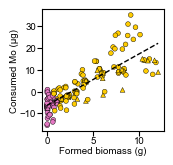

In [50]:
data = offline_data
data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
# data = data[(data["Strain Type"] == "WT")]
# data = data[(data["Strain Type"] == "WT")]

data = offline_data
data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
# data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["Timepoint (#)"] == "S12"))]
# data = data[(data["Strain Type"] == "WT")]
data = data[(data["Media version"] != "v3")]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])


sns.scatterplot(
    data = data,
    x = "net_biomass_g",
    y = "net_mo_µg",
    hue = "mu_set",
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    palette = ['tab:pink', yellow, 'tab:blue', 'tab:orange'],
    hue_order=['none', 0.11, 0.05, 0.1],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=1,
    ax=ax
)

ax.get_legend().remove()

ax.set_ylabel("Consumed Mo (µg)")
ax.set_xlabel("Formed biomass (g)")

###################

regression_data = data
# regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_mo_µg", "net_biomass_g"]]
regression_data = regression_data.dropna()

x = regression_data["net_biomass_g"]
y = regression_data["net_mo_µg"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Mo_growth_yield.svg", dpi=900)

print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

In [51]:
len(data.dropna(subset=["mo [µg/L]"])["Parent Culture"].unique())

31

#### Zn

slope: 35.10225674426148
intercept: -40.16012408449485
r_value: 0.8158801843879717
r^2: 0.6656604752769507
p_value: 1.2781742199999373e-67
std_err: 1.4974349743925415


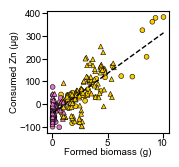

In [52]:
data = offline_data

data = data[(data["Base Medium"] == "DDB_BM_002") | (data["Base Medium"] == "DDB_BM_PD60_R06") | (data["Base Medium"] == "DDB_BM_PD60_R07") | (data["Base Medium"] == "DDB_BM_PD60_R09")]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])


# sns.scatterplot(
#     data = data,
#     x = "net_biomass_g",
#     y = "net_zn_µg",
#     hue = "mu_set",
#     style = "Strain Type",
#     style_order=['WT', 'TF KO', 'TPS'],
#     markers = ["o", "^", "s"],
#     palette = ['tab:pink', 'tab:green', 'tab:blue', 'tab:orange'],
#     hue_order=['none', 0.11, 0.05, 0.1],
#     linewidth=0.3,
#     edgecolor='k',
#     s=12,
#     alpha=0.3,
#     ax=ax
# )

data = offline_data

data = data[data["Base Medium"] != "DDB_BM_002"]
data = data[data["Base Medium"] != "DDB_BM_PD60_R06"]
data = data[data["Base Medium"] != "DDB_BM_PD60_R07"]
data = data[data["Base Medium"] != "DDB_BM_PD60_R09"]
data = data[(data["Media version"] != "v3")]


sns.scatterplot(
    data = data,
    x = "net_biomass_g",
    y = "net_zn_µg",
    hue = "mu_set",
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    palette = ['tab:pink', yellow, 'tab:blue', 'tab:orange'],
    hue_order=['none', 0.11, 0.05, 0.1],
    linewidth=0.4,
    edgecolor='k',
    s=12,
    alpha=1,
    ax=ax
)

ax.get_legend().remove()

ax.set_ylabel("Consumed Zn (µg)")
ax.set_xlabel("Formed biomass (g)")

###################

regression_data = data
# regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_zn_µg", "net_biomass_g"]]
regression_data = regression_data.dropna()

x = regression_data["net_biomass_g"]
y = regression_data["net_zn_µg"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Zn_growth_yield.svg", dpi=900)

print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

In [53]:
len(data.dropna(subset=["zn [µg/L]"])["Parent Culture"].unique())

39

In [54]:
metal = ["Fe", "Mg", "Mn", "Mo", "Zn"]
slope = [168.10873834113244, 3478.98069957697, 4.355591712706063, 2.3672275009322674, 35.10225674426148]
sterr = [5.1697546237867975, 124.21189367983854, 0.22919466137514508, 0.09552687247593997, 1.4974349743925415]

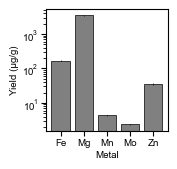

In [55]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

plt.bar(
    metal,
    slope,
    yerr=sterr,
    color="grey",
    ecolor="k",
    # capsize=2,
    linewidth=0.5,
    edgecolor="k",
    error_kw={
        "elinewidth":0.5
    }
)

# ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
# ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])

ax.set_yscale("log")
ax.set_xlabel("Metal")
ax.set_ylabel("Yield (µg/g)")

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("metal_yields_log.svg", dpi=900)

### Excess factor

In [57]:
df = pd.read_excel("growth_yield_factor_and_excess_factor_evaluation.xlsx", sheet_name="df")

In [58]:
df = df[df["Element"] != "C"]
df = df[df["Element"] != "Ca"]
df = df[df["Element"] != "Co"]
df = df[df["Element"] != "Cu"]
df = df[df["Element"] != "K"]

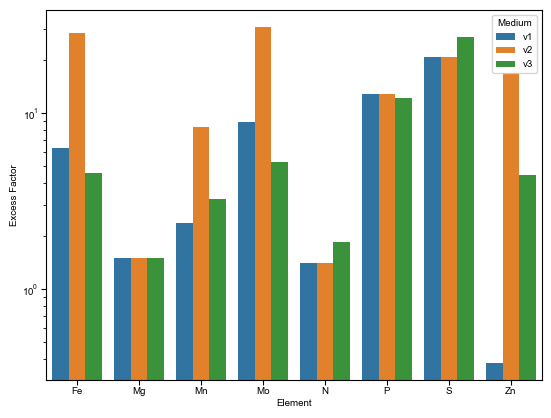

In [59]:
sns.barplot(
    data=df[df["Mixture"] == "1:0"],
    x="Element",
    y="Excess Factor",
    hue="Medium"
)
plt.yscale("log")

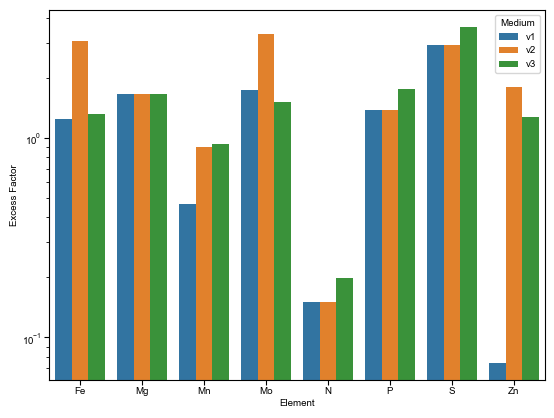

In [60]:
sns.barplot(
    data=df[df["Mixture"] == "3:1"],
    x="Element",
    y="Excess Factor",
    hue="Medium"
)
plt.yscale("log")

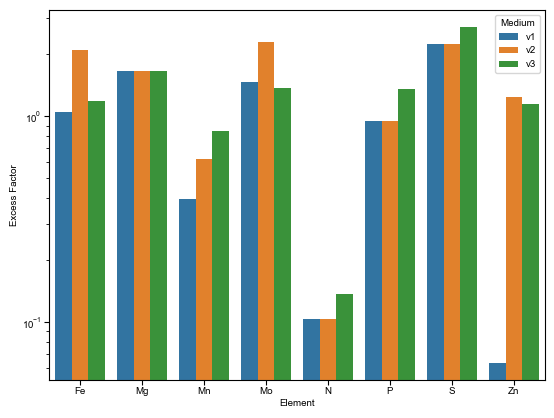

In [61]:
sns.barplot(
    data=df[df["Mixture"] == "2:1"],
    x="Element",
    y="Excess Factor",
    hue="Medium"
)
plt.yscale("log")

### Timeplots

<Axes: xlabel='feed_time', ylabel='zn [µg/L]'>

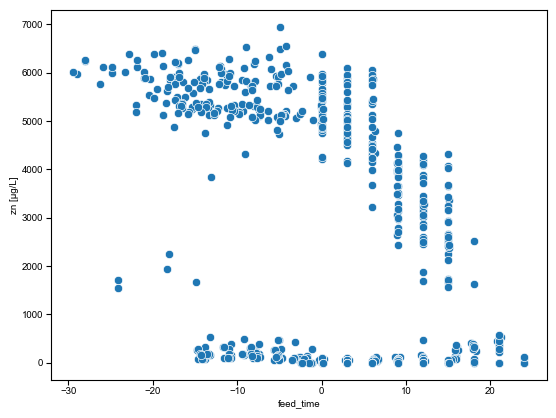

In [62]:
sns.scatterplot(
    data=offline_data,
    x="feed_time",
    y="zn [µg/L]"
)

<Axes: xlabel='feed_time', ylabel='fe [µg/L]'>

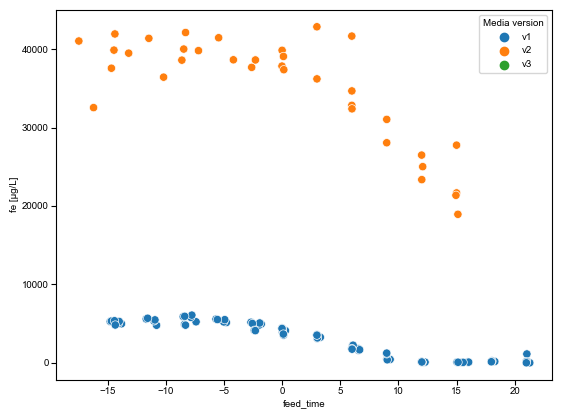

In [63]:
data = offline_data[offline_data["Strain Type"] =="WT"]
# data = data[data["Experiment"] != "DDB_PD_005_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_116_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_117_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_121_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_122_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_123_AMBR"]

sns.scatterplot(
    data=data,
    x="feed_time",
    y="fe [µg/L]",
    hue="Media version"
)

<Axes: xlabel='feed_time', ylabel='zn [µg/L]'>

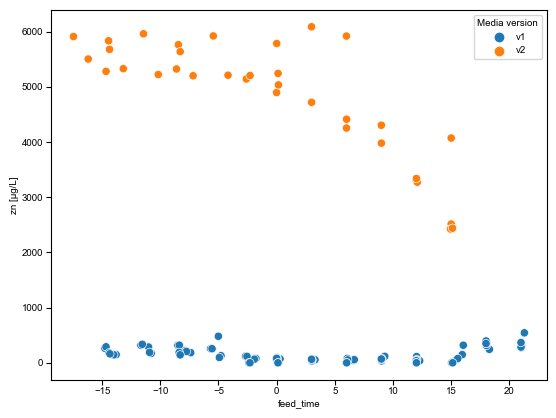

In [64]:
data = offline_data[offline_data["Strain Type"] =="WT"]
# data = data[data["Experiment"] != "DDB_PD_005_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_116_AMBR"]
data = data[data["Experiment"] != "DDB_PD_117_AMBR"]
data = data[data["Experiment"] != "DDB_PD_121_AMBR"]
data = data[data["Experiment"] != "DDB_PD_122_AMBR"]
data = data[data["Experiment"] != "DDB_PD_123_AMBR"]

sns.scatterplot(
    data=data,
    x="feed_time",
    y="zn [µg/L]",
    hue="Media version"
)

<Axes: xlabel='feed_time', ylabel='mn [µg/L]'>

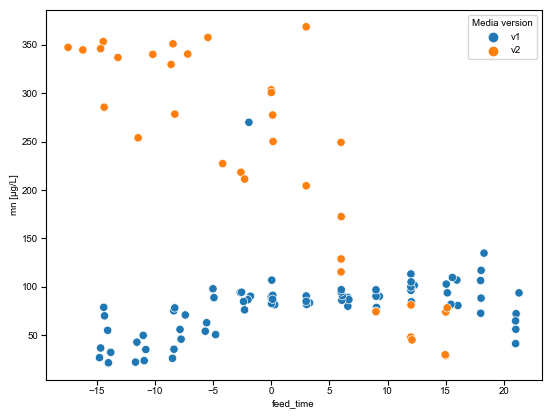

In [65]:
data = offline_data[offline_data["Strain Type"] =="WT"]
data = data[data["Experiment"] != "DDB_PD_005_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_116_AMBR"]
data = data[data["Experiment"] != "DDB_PD_117_AMBR"]
data = data[data["Experiment"] != "DDB_PD_121_AMBR"]
data = data[data["Experiment"] != "DDB_PD_122_AMBR"]
data = data[data["Experiment"] != "DDB_PD_123_AMBR"]

sns.scatterplot(
    data=data,
    x="feed_time",
    y="mn [µg/L]",
    hue="Media version"
)

<Axes: xlabel='feed_time', ylabel='mo [µg/L]'>

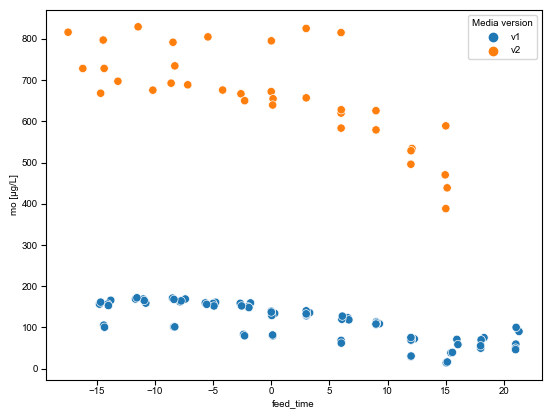

In [66]:
data = offline_data[offline_data["Strain Type"] =="WT"]
data = data[data["Experiment"] != "DDB_PD_005_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_116_AMBR"]
data = data[data["Experiment"] != "DDB_PD_117_AMBR"]
data = data[data["Experiment"] != "DDB_PD_121_AMBR"]
data = data[data["Experiment"] != "DDB_PD_122_AMBR"]
data = data[data["Experiment"] != "DDB_PD_123_AMBR"]

sns.scatterplot(
    data=data,
    x="feed_time",
    y="mo [µg/L]",
    hue="Media version"
)

<Axes: xlabel='feed_time', ylabel='mg [mg/L]'>

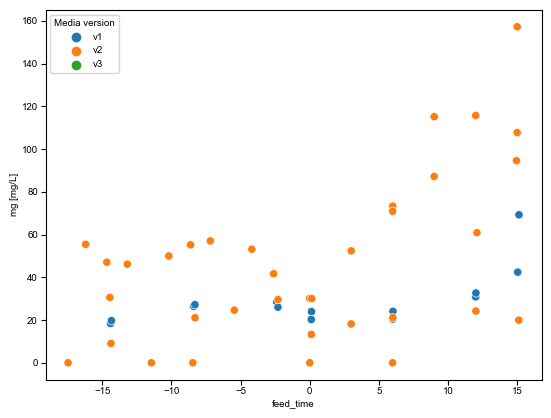

In [67]:
data = offline_data[offline_data["Strain Type"] =="WT"]
# data = data[data["Experiment"] != "DDB_PD_005_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_116_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_117_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_121_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_122_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_123_AMBR"]

sns.scatterplot(
    data=data,
    x="feed_time",
    y="mg [mg/L]",
    hue="Media version"
)

<Axes: xlabel='feed_time', ylabel='mn [µg/L]'>

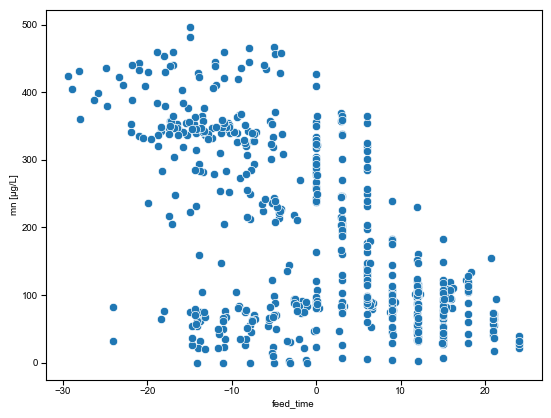

In [68]:
sns.scatterplot(
    data=offline_data,
    x="feed_time",
    y="mn [µg/L]"
)

<Axes: xlabel='feed_time', ylabel='mo [µg/L]'>

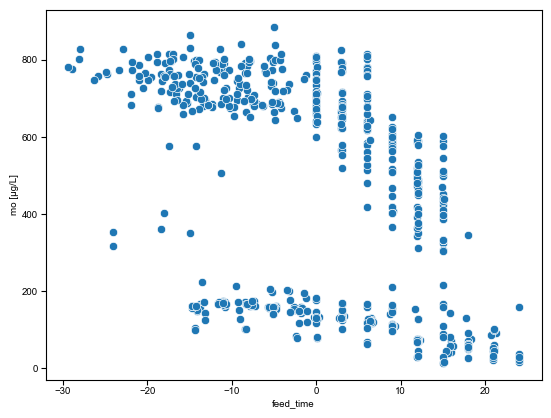

In [69]:
sns.scatterplot(
    data=offline_data,
    x="feed_time",
    y="mo [µg/L]"
)

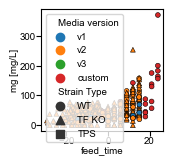

In [70]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

sns.scatterplot(
    data=offline_data,
    x="feed_time",
    y="mg [mg/L]",
    hue="Media version",
    palette="tab10",
    hue_order=["v1", "v2", "v3", "custom"],
    s=12,
    linewidth=0.4,
    edgecolor='k',
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    alpha=1,
    ax=ax
)

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Mg_timeplot.svg", dpi=900)

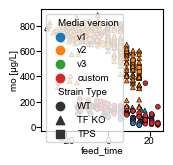

In [71]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

sns.scatterplot(
    data=offline_data,
    x="feed_time",
    y="mo [µg/L]",
    hue="Media version",
    palette="tab10",
    hue_order=["v1", "v2", "v3", "custom"],
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    s=12,
    linewidth=0.4,
    edgecolor='k',
    alpha=1,
    ax=ax
)

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Mo_timeplot.svg", dpi=900)

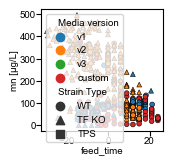

In [72]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 0.5
plt.rcParams['ytick.major.pad']= 0.5

plt.rcParams['axes.labelpad']= 0.5

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

sns.scatterplot(
    data=offline_data,
    x="feed_time",
    y="mn [µg/L]",
    hue="Media version",
    palette="tab10",
    hue_order=["v1", "v2", "v3", "custom"],
    s=12,
    linewidth=0.4,
    edgecolor='k',
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    alpha=1,
    ax=ax
)

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Mn_timeplot.svg", dpi=900)

C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\2313263041.py:26: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


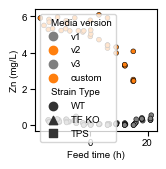

In [73]:
data = offline_data[offline_data["Strain Type"] =="WT"]
data = data[data["Experiment"] != "DDB_PD_005_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_116_AMBR"]
data = data[data["Experiment"] != "DDB_PD_117_AMBR"]
data = data[data["Experiment"] != "DDB_PD_121_AMBR"]
data = data[data["Experiment"] != "DDB_PD_122_AMBR"]
data = data[data["Experiment"] != "DDB_PD_123_AMBR"]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

sns.scatterplot(
    data=data,
    x="feed_time",
    y="zn [µg/L]",
    hue="Media version",
    palette=["tab:grey", "tab:orange"],
    hue_order=["v1", "v2", "v3", "custom"],
    s=12,
    linewidth=0.4,
    edgecolor='k',
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    alpha=1,
    ax=ax
)

ax.set_ylabel("Zn (mg/L)")
ax.set_xlabel("Feed time (h)")

ax.set_yticks([0,2000,4000,6000],[0,2,4,6])

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Zn_timeplot.svg", dpi=900)

In [74]:
data.dropna(subset=["zn [µg/L]"])[["Parent Culture","Media version"]].drop_duplicates()

,Parent Culture,Media version
278,DDB_PD_036_AMBR_DDB35-001_R14_Main_,v1
317,DDB_PD_036_AMBR_DDB35-001_R17_Main_,v1
329,DDB_PD_036_AMBR_DDB35-001_R18_Main_,v1
368,DDB_PD_036_AMBR_DDB35-001_R21_Main_,v1
381,DDB_PD_036_AMBR_DDB35-001_R22_Main_,v1
672,DDB_PD_065_AMBR_DDB7-006_R13_Main_,v2
793,DDB_PD_066_AMBR_DDB7-006_R13_Main_,v2
1030,DDB_PD_073_AMBR_DDB35-001_R01_Main_,v1
1037,DDB_PD_073_AMBR_DDB35-001_R02_Main_,v1
1044,DDB_PD_073_AMBR_DDB35-001_R03_Main_,v2


In [75]:
data.dropna(subset=["fe [µg/L]"])[["Parent Culture","Media version"]].drop_duplicates()

,Parent Culture,Media version
278,DDB_PD_036_AMBR_DDB35-001_R14_Main_,v1
317,DDB_PD_036_AMBR_DDB35-001_R17_Main_,v1
329,DDB_PD_036_AMBR_DDB35-001_R18_Main_,v1
368,DDB_PD_036_AMBR_DDB35-001_R21_Main_,v1
381,DDB_PD_036_AMBR_DDB35-001_R22_Main_,v1
672,DDB_PD_065_AMBR_DDB7-006_R13_Main_,v2
793,DDB_PD_066_AMBR_DDB7-006_R13_Main_,v2
1030,DDB_PD_073_AMBR_DDB35-001_R01_Main_,v1
1037,DDB_PD_073_AMBR_DDB35-001_R02_Main_,v1
1044,DDB_PD_073_AMBR_DDB35-001_R03_Main_,v2


C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\1436756491.py:26: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


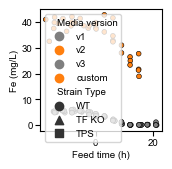

In [76]:
data = offline_data[offline_data["Strain Type"] =="WT"]
data = data[data["Experiment"] != "DDB_PD_005_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_116_AMBR"]
data = data[data["Experiment"] != "DDB_PD_117_AMBR"]
data = data[data["Experiment"] != "DDB_PD_121_AMBR"]
data = data[data["Experiment"] != "DDB_PD_122_AMBR"]
data = data[data["Experiment"] != "DDB_PD_123_AMBR"]

plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure()
spec = fig.add_gridspec(nrows=1, ncols=1)

# frame = fig.add_subplot(spec[:,:])
ax = fig.add_subplot(spec[:,:])

sns.scatterplot(
    data=data,
    x="feed_time",
    y="fe [µg/L]",
    hue="Media version",
    palette=["tab:grey", "tab:orange"],
    hue_order=["v1", "v2", "v3", "custom"],
    s=12,
    linewidth=0.4,
    edgecolor='k',
    style = "Strain Type",
    style_order=['WT', 'TF KO', 'TPS'],
    markers = ["o", "^", "s"],
    alpha=1,
    ax=ax
)

ax.set_ylabel("Fe (mg/L)")
ax.set_xlabel("Feed time (h)")

ax.set_yticks([0,10000,20000,30000,40000],[0,10,20,30,40])

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)
# plt.savefig("Fe_timeplot.svg", dpi=900)

## Fed-batch cultures

<Axes: xlabel='feed_time', ylabel='CTR'>

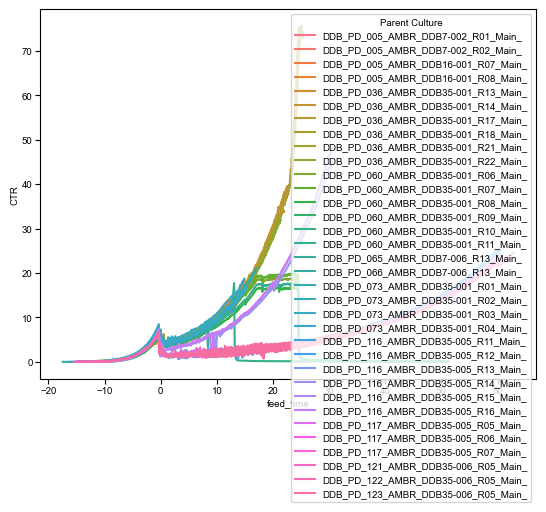

In [77]:
data = online_data
data = data[data["Strain Type"] == "WT"]
# data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
# data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]

sns.lineplot(
    data = data,
    x = "feed_time",
    y = "CTR",
    hue = "Parent Culture"
)

In [78]:
data[["Parent Culture", "growth_rate"]].drop_duplicates().groupby("growth_rate").size()

growth_rate
0.05     9
0.10     3
0.11    22
dtype: int64

C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\3037721489.py:9: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='feed_time', ylabel='net_biomass_g'>

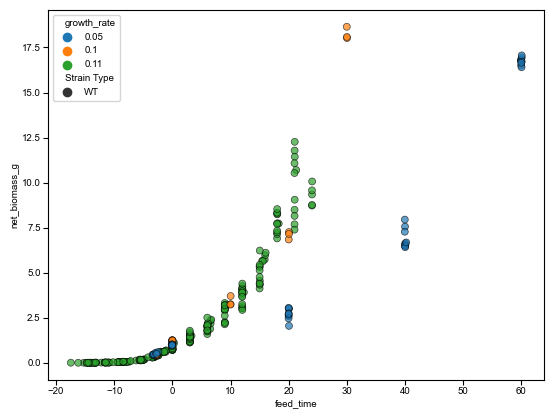

In [79]:
data = offline_data
data = data[data["Strain Type"] == "WT"]
# data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
# data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]

sns.scatterplot(
    data = data,
    x = "feed_time",
    y = "net_biomass_g",
    # hue = "Strain Type",
    hue = "growth_rate",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    linewidth=0.5,
    edgecolor='k',
    alpha=0.7,
    s=25
)

In [80]:
data[["Parent Culture", "growth_rate"]].drop_duplicates().groupby("growth_rate").size()

growth_rate
0.05     9
0.10     3
0.11    22
dtype: int64

<Axes: xlabel='net_glucose_g', ylabel='Formed_CO2'>

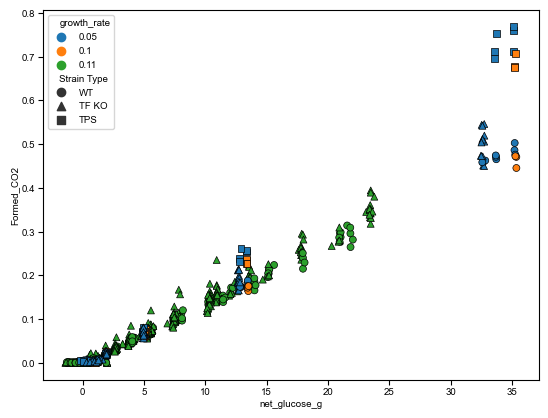

In [81]:
data = offline_data
# data = data[data["Strain Type"] == "WT"]
# data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_060_AMBR") & (data["Reactor/Plate/Flask Number"] == "R09"))]
# data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_067_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
# data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]

sns.scatterplot(
    data = data,
    x = "net_glucose_g",
    y = "Formed_CO2",
    # hue = "Strain Type",
    hue = "growth_rate",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    linewidth=0.5,
    edgecolor='k',
    s=25
)

In [82]:
data[["Parent Culture", "growth_rate"]].drop_duplicates().groupby("growth_rate").size()

growth_rate
0.05    29
0.10     6
0.11    97
dtype: int64

In [83]:
data[["Parent Culture", "Strain Type"]].drop_duplicates().groupby("Strain Type").size()

Strain Type
TF KO    90
TPS       9
WT       33
dtype: int64

<Axes: xlabel='net_glucose_g', ylabel='net_biomass_g'>

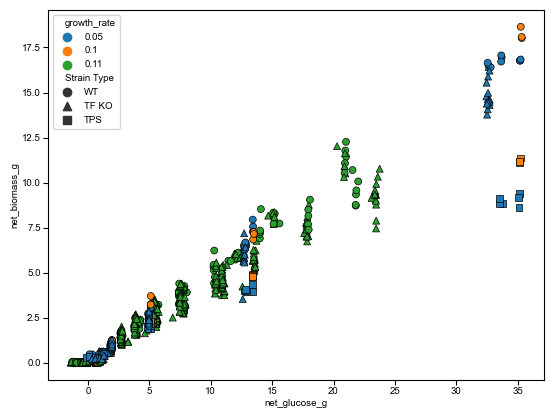

In [84]:
data = offline_data
# data = data[data["Strain Type"] == "WT"]
# data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
# data = data[~((data["Experiment"] == "DDB_PD_060_AMBR") & (data["Reactor/Plate/Flask Number"] == "R09"))]
# data = data[data["Experiment"] != "DDB_PD_045_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_067_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
# data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
# data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]

sns.scatterplot(
    data = data,
    x = "net_glucose_g",
    y = "net_biomass_g",
    # hue = "Strain Type",
    hue = "growth_rate",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    linewidth=0.5,
    edgecolor='k',
    s=25
)

In [85]:
data[["Parent Culture", "growth_rate"]].drop_duplicates().groupby("growth_rate").size()

growth_rate
0.05    29
0.10     6
0.11    98
dtype: int64

In [86]:
data[["Parent Culture", "Strain Type"]].drop_duplicates().groupby("Strain Type").size()

Strain Type
TF KO    90
TPS       9
WT       34
dtype: int64

### Offline data Biomass yield over time

In [87]:
offline_data["Ysx"] = offline_data["net_biomass_g"]/offline_data["net_glucose_g"]
offline_data["Ysc"] = offline_data["Formed_CO2"]/offline_data["net_glucose_g"]

C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\665947665.py:6: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='feed_time', ylabel='Ysc'>

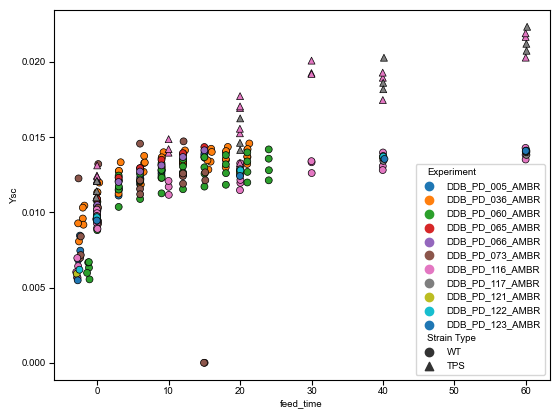

In [88]:
data = offline_data
data = data[data["feed_time"] > -3]
data = data[data["Strain Type"] != "TF KO"]
data = data[~((data["Experiment"] == "DDB_PD_060_AMBR") & (data["Reactor/Plate/Flask Number"] == "R09"))]

sns.scatterplot(
    data = data,
    x = "feed_time",
    y = "Ysc",
    # hue = "Strain Type",
    hue = "Experiment",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    linewidth=0.5,
    edgecolor='k',
    s=25
)

### Plotting fed-batch data

C:\Users\jonas\AppData\Local\Temp\ipykernel_24716\1761564058.py:224: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(


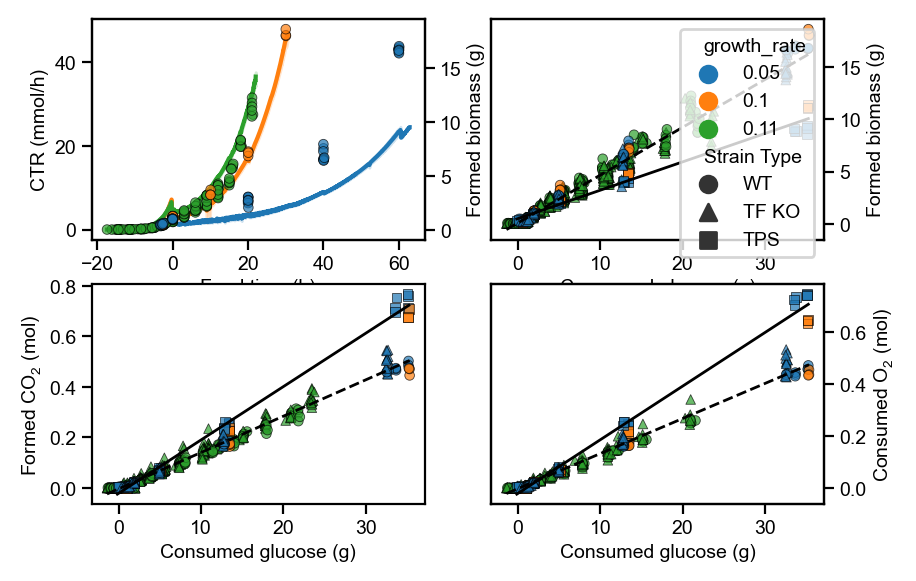

In [89]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=2, ncols=2)

ax1 = fig.add_subplot(spec[0,0])
ax1_1 = ax1.twinx()
ax2 = fig.add_subplot(spec[0,1])
ax2_1 = ax2.twinx()
ax3 = fig.add_subplot(spec[1,0])
ax4 = fig.add_subplot(spec[1,1])
ax4_1 = ax4.twinx()

#############################
#############################

data = offline_data

sns.scatterplot(
    data = data,
    x = "net_glucose_g",
    y = "net_biomass_g",
    # hue = "Strain Type",
    hue = "growth_rate",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    hue_order=[0.05,0.1,0.11],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=0.7,
    ax=ax2_1
)

# ax2_1.get_legend().remove()
ax2.set_yticks([])

ax2_1.set_ylabel("Formed biomass (g)")
ax2.set_xlabel("Consumed glucose (g)")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_g", "net_biomass_g"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_g"]
y = regression_data["net_biomass_g"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax2_1.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_g", "net_biomass_g"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_g"]
y = regression_data["net_biomass_g"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax2_1.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

#############################
#############################

data = offline_data
data = data[~((data["Experiment"] == "DDB_PD_060_AMBR") & (data["Reactor/Plate/Flask Number"] == "R09"))]

sns.scatterplot(
    data = data,
    x = "net_glucose_g",
    y = "Formed_CO2",
    # hue = "Strain Type",
    hue = "growth_rate",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    hue_order=[0.05,0.1,0.11],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=0.7,
    ax=ax3
)

ax3.get_legend().remove()

ax3.set_ylabel("Formed $CO_{2}$ (mol)")
ax3.set_xlabel("Consumed glucose (g)")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_g", "Formed_CO2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_g"]
y = regression_data["Formed_CO2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax3.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_g", "Formed_CO2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_g"]
y = regression_data["Formed_CO2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax3.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

#############################
#############################

data = offline_data
data = data[data["Experiment"] != "DDB_PD_045_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
data = data[data["Experiment"] != "DDB_PD_067_AMBR"]
data = data[data["Experiment"] != "DDB_PD_073_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]

sns.scatterplot(
    data = data,
    x = "net_glucose_g",
    y = "Consumed_O2",
    # hue = "Strain Type",
    hue = "growth_rate",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    hue_order=[0.05,0.1,0.11],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=0.7,
    ax=ax4_1
)

ax4_1.get_legend().remove()
ax4.set_yticks([])

ax4_1.set_ylabel("Consumed $O_{2}$ (mol)")
ax4.set_xlabel("Consumed glucose (g)")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_g", "Consumed_O2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_g"]
y = regression_data["Consumed_O2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax4_1.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_g", "Consumed_O2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_g"]
y = regression_data["Consumed_O2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax4_1.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

#############################
#############################

data = offline_data
data = data[data["Strain Type"] == "WT"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]

sns.scatterplot(
    data = data,
    x = "feed_time",
    y = "net_biomass_g",
    # hue = "Strain Type",
    hue = "growth_rate",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = "tab10",
    hue_order=[0.05,0.1,0.11],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=0.7,
    ax=ax1_1
)

ax1_1.get_legend().remove()

ax1_1.set_ylabel("Formed biomass (g)")
ax1.set_xlabel("Feed time (h)")

#############################
#############################

data = online_data
data = data[data["Strain Type"] == "WT"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]

sns.lineplot(
    data = data,
    x = "feed_time",
    y = "CTR",
    hue = "growth_rate",
    palette = "tab10",
    hue_order=[0.05,0.1,0.11],
    ax=ax1
)

ax1.get_legend().remove()

ax1.set_ylabel("CTR (mmol/h)")

w=120/25.4
h=80/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("Fed-batch_fermentation_data_raw.svg", dpi=900);

#### Single plots

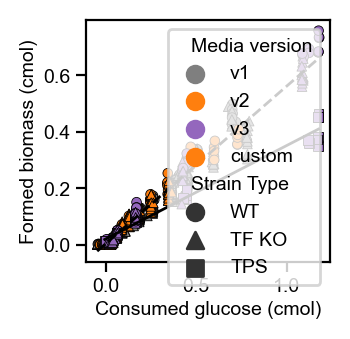

In [90]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[0,0])

#############################
#############################

data = offline_data

sns.scatterplot(
    data = data,
    x = "net_glucose_cmol",
    y = "net_biomass_cmol",
    # hue = "Strain Type",
    hue = "Media version",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = ["tab:grey", "tab:orange", "tab:purple", "tab:orange"],
    hue_order=["v1","v2","v3","custom"],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=1.0,
    ax=ax
)

# ax2_1.get_legend().remove()
# ax.set_yticks([])

ax.set_ylabel("Formed biomass (cmol)")
ax.set_xlabel("Consumed glucose (cmol)")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_cmol", "net_biomass_cmol"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["net_biomass_cmol"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_cmol", "net_biomass_cmol"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["net_biomass_cmol"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

#############################
#############################

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("Biomass_yield.svg", dpi=900);

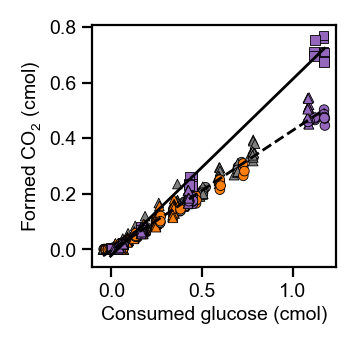

In [91]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[0,0])

#############################
#############################

data = offline_data
data = data[~((data["Experiment"] == "DDB_PD_060_AMBR") & (data["Reactor/Plate/Flask Number"] == "R09"))]

sns.scatterplot(
    data = data,
    x = "net_glucose_cmol",
    y = "Formed_CO2",
    # hue = "Strain Type",
    hue = "Media version",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = ["tab:grey", "tab:orange", "tab:purple", "tab:orange"],
    hue_order=["v1","v2","v3","custom"],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=1.0,
    ax=ax
)

ax.get_legend().remove()

ax.set_ylabel("Formed $CO_{2}$ (cmol)")
ax.set_xlabel("Consumed glucose (cmol)")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Formed_CO2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Formed_CO2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Formed_CO2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Formed_CO2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

#############################
#############################

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("CO2_yield.svg", dpi=900);

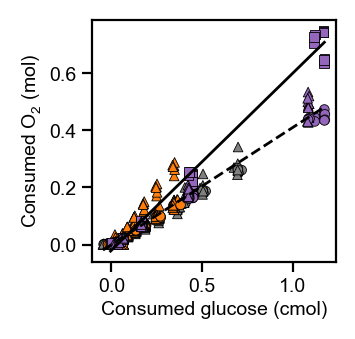

In [92]:
plt.rcParams['font.size'] = 7
plt.rcParams.update({'font.sans-serif':'Arial'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.rcParams['xtick.major.pad']= 2
plt.rcParams['ytick.major.pad']= 2

plt.rcParams['axes.labelpad']= 2

fig = plt.figure(dpi=200)
spec = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(spec[0,0])

#############################
#############################

data = offline_data
data = data[data["Experiment"] != "DDB_PD_045_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_067_AMBR"]
# data = data[data["Experiment"] != "DDB_PD_073_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]

sns.scatterplot(
    data = data,
    x = "net_glucose_cmol",
    y = "Consumed_O2",
    # hue = "Strain Type",
    hue = "Media version",
    style = "Strain Type",
    # style = "growth_rate",
    markers = ["o", "^", "s"],
    palette = ["tab:grey", "tab:orange", "tab:purple", "tab:orange"],
    hue_order=["v1","v2","v3","custom"],
    linewidth=0.3,
    edgecolor='k',
    s=12,
    alpha=1.0,
    ax=ax
)

ax.get_legend().remove()
# ax.set_yticks([])

ax.set_ylabel("Consumed $O_{2}$ (mol)")
ax.set_xlabel("Consumed glucose (cmol)")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Consumed_O2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Consumed_O2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="-")

###################

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Consumed_O2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Consumed_O2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
ax.plot([min(x), max(x)], [min(line), max(line)], 'k', label='y={:.2f}x+{:.2f}'.format(slope,intercept), linewidth=1, linestyle="--")

#############################
#############################

w=40/25.4
h=40/25.4
fig.set_size_inches(w=w,h=h)

# plt.savefig("O2_yield.svg", dpi=900);

In [93]:
data = offline_data
data = data[data["Strain Type"] == "WT"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]
len(data["Parent Culture"].unique())

26

### Printing regression line equations

#### Ysx (TPS)

In [94]:
data = offline_data

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_cmol", "net_biomass_cmol"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["net_biomass_cmol"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

slope: 0.33146110195282574
intercept: 0.020567208769899606
r_value: 0.9879085559543228
r^2: 0.9759633149277553
p_value: 1.8902980713620787e-36
std_err: 0.00793266075876888


#### Ysx (not TPS)

In [95]:
data = offline_data

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_cmol", "net_biomass_cmol"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["net_biomass_cmol"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

slope: 0.5589215227427481
intercept: 0.003710757603997167
r_value: 0.9873254512861037
r^2: 0.9748115467573084
p_value: 0.0
std_err: 0.0027832831565560586


In [96]:
data[["Parent Culture", "growth_rate"]].drop_duplicates().groupby("growth_rate").size()

growth_rate
0.05    29
0.10     6
0.11    98
dtype: int64

In [97]:
data[["Parent Culture", "Strain Type"]].drop_duplicates().groupby("Strain Type").size()

Strain Type
TF KO    90
TPS       9
WT       34
dtype: int64

In [98]:
len(data.dropna(subset=["net_glucose_g", "net_biomass_g"])["Parent Culture"].unique())

119

In [99]:
len(data["Parent Culture"].unique())

133

#### Ysc (TPS)

In [100]:
data = offline_data
data = data[~((data["Experiment"] == "DDB_PD_060_AMBR") & (data["Reactor/Plate/Flask Number"] == "R09"))]

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Formed_CO2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Formed_CO2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

slope: 0.6331685195664372
intercept: -0.020778010203511083
r_value: 0.9968975106563829
r^2: 0.993804646752893
p_value: 9.152539658381634e-56
std_err: 0.007141736122753543


#### Ysc (not TPS)

In [101]:
data = offline_data
data = data[~((data["Experiment"] == "DDB_PD_060_AMBR") & (data["Reactor/Plate/Flask Number"] == "R09"))]

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Formed_CO2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Formed_CO2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

slope: 0.431167099987762
intercept: -0.0031148953802694057
r_value: 0.9931806654978687
r^2: 0.9864078343187893
p_value: 0.0
std_err: 0.0014746502982137851


In [102]:
data[["Parent Culture", "growth_rate"]].drop_duplicates().groupby("growth_rate").size()

growth_rate
0.05    29
0.10     6
0.11    97
dtype: int64

In [103]:
data[["Parent Culture", "Strain Type"]].drop_duplicates().groupby("Strain Type").size()

Strain Type
TF KO    90
TPS       9
WT       33
dtype: int64

In [104]:
len(data.dropna(subset=["net_glucose_g", "Formed_CO2"])["Parent Culture"].unique())

132

#### Yso (TPS)

In [105]:
data = offline_data
data = data[data["Experiment"] != "DDB_PD_045_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
data = data[data["Experiment"] != "DDB_PD_067_AMBR"]
data = data[data["Experiment"] != "DDB_PD_073_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] == "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Consumed_O2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Consumed_O2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

slope: 0.6207236744681941
intercept: -0.020041508049708445
r_value: 0.9948852570061467
r^2: 0.9897966746081867
p_value: 1.8661141423916844e-50
std_err: 0.009003225812739437


#### Yso (not TPS)

In [106]:
data = offline_data
data = data[data["Experiment"] != "DDB_PD_045_AMBR"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_065_AMBR"]
data = data[data["Experiment"] != "DDB_PD_066_AMBR"]
data = data[data["Experiment"] != "DDB_PD_067_AMBR"]
data = data[data["Experiment"] != "DDB_PD_073_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]

regression_data = data
regression_data = regression_data[regression_data["Strain Type"] != "TPS"]
regression_data = regression_data[["net_glucose_cmol", "Consumed_O2"]]
regression_data = regression_data.dropna()

x = regression_data["net_glucose_cmol"]
y = regression_data["Consumed_O2"]

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("slope:",slope)
print("intercept:",intercept)
print("r_value:",r_value)
print("r^2:",r_value*r_value)
print("p_value:",p_value)
print("std_err:",std_err)

slope: 0.40586943873083076
intercept: -0.0017822866468297643
r_value: 0.9922847222804777
r^2: 0.9846289700712447
p_value: 0.0
std_err: 0.00215450074132618


In [107]:
data[["Parent Culture", "growth_rate"]].drop_duplicates().groupby("growth_rate").size()

growth_rate
0.05    29
0.10     6
0.11    36
dtype: int64

In [108]:
data[["Parent Culture", "Strain Type"]].drop_duplicates().groupby("Strain Type").size()

Strain Type
TF KO    40
TPS       9
WT       22
dtype: int64

In [109]:
len(data.dropna(subset=["net_glucose_g", "Consumed_O2"])["Parent Culture"].unique())

71

In [110]:
data = online_data
data = data[data["Strain Type"] == "WT"]
data = data[data["Experiment"] != "DDB_PD_060_AMBR"]
data = data[data["Experiment"] != "DDB_PD_139_AMBR"]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R01"))]
data = data[~((data["Experiment"] == "DDB_PD_073_AMBR") & (data["Reactor/Plate/Flask Number"] == "R02"))]
data = data[~((data["Experiment"] == "DDB_PD_036_AMBR") & (data["feed_time"] > 22))]
data[["Parent Culture", "Strain Type"]].drop_duplicates().groupby("Strain Type").size()

Strain Type
WT    26
dtype: int64